# Comparing Algorithm in Stress Detection Comparison

I want to upgrade [surekhacdk repo](https://github.com/surekhacdk/Stress_Detection)

## 0. Initialize the module and dataset

In [48]:
# Preprocessing
from sklearn import preprocessing

# Split Function
from sklearn.model_selection import train_test_split

# Metric accuracy
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Base Module
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [49]:
# Read the dataset
df = pd.read_excel('stress_data.xlsx', header=None)

In [50]:
# Give column
df.columns = ['Target', 'ECG(mV)', 'EMG(mV)', 'Foot GSR(mV)',
              'Hand GSR(mV)', 'HR(bpm)', 'RESP(mV)']

In [51]:
# Plotting function

def build_plot():
  plt.figure(figsize=(10,8))

  plt.scatter(df['Hand GSR(mV)'], df['HR(bpm)'],
                 color='green', label='input scale',
                 alpha=0.5)
  
  plt.scatter(df_minmax[:,0], df_minmax[:,1],
              color='blue', label='min-max scaled [min=0, max=1]',
              alpha=0.3)
  
  plt.title('Hand GSR and HR Content of the Physicological Dataset')
  plt.xlabel("Hand GSR")
  plt.ylabel('HR')
  plt.legend(loc='upper left')
  plt.grid()

  plt.tight_layout()

In [52]:
df.head()

,Target,ECG(mV),EMG(mV),Foot GSR(mV),Hand GSR(mV),HR(bpm),RESP(mV)
0,1,0.004,-0.005,2.890,18.706,95.144,11.579
1,0,-0.008,0.846,1.859,2.578,71.115,34.964
2,0,0.003,0.724,1.477,3.357,66.789,38.982
3,0,0.000,0.632,17.726,9.942,81.241,32.815
4,0,-0.593,0.442,4.826,5.824,68.132,39.392


In [53]:
X = df.iloc[:, 1:7]
y = df.iloc[:, 0]

### Split the data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

### MinMaxScaling

In [55]:
minmax_scale = preprocessing.MinMaxScaler().fit(X)
df_minmax = minmax_scale.transform(X)

In [56]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X, y,
                                                                        test_size=0.2,
                                                                        random_state=42)

### Plot

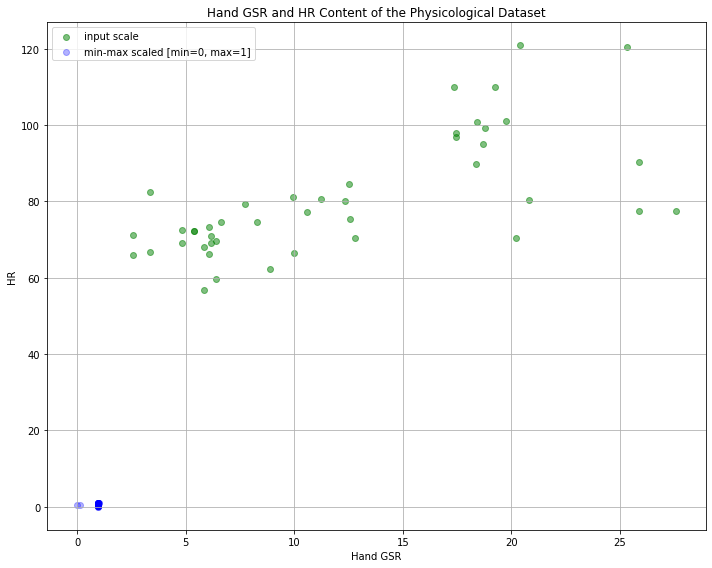

In [57]:
build_plot()
plt.show()

## 2. Naive Bayes (Gaussian NB)

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics # Specific to this part

### Predictions

In [59]:
# Non-normalized data
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)

# Normalized_data
gnb_norm = GaussianNB()
gnb_fit_norm = gnb_norm.fit(X_train_norm, y_train_norm)

In [60]:
pred_train = gnb.predict(X_train)
pred_test = gnb.predict(X_test)

### Accuracy

In [61]:
print("Accuracy measure for dataset")
print("{:.2%}\n".format(accuracy_score(y_test, pred_test)))

Accuracy measure for dataset
88.89%



In [62]:
print("Accuracy measure for normalized dataset")
pred_test_norm = gnb_norm.predict(X_test_norm)
print("{:.2%}\n".format(accuracy_score(y_test_norm, pred_test_norm)))

Accuracy measure for normalized dataset
88.89%



### True vs Predicted

In [63]:
print("True target values:", y_test_norm.values[0:25])
print("Predicted target values:", pred_test_norm[0:25])

True target values: [1 0 0 0 1 1 0 1 0]
Predicted target values: [1 0 0 1 1 1 0 1 0]


### Confusion Matrix

In [64]:
print(confusion_matrix(y_test_norm, pred_test_norm))
print("True:", y_test.values[0:25])
print("Pred:", pred_test_norm[0:25])

[[4 1]
 [0 4]]
True: [1 0 0 0 1 1 0 1 0]
Pred: [1 0 0 1 1 1 0 1 0]


In [65]:
confusion = confusion_matrix(y_test_norm, pred_test_norm)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [66]:
# Classification accuracy - how often classification correct
print("Classification Accuracy:", accuracy_score(y_test_norm, pred_test_norm))

# Classification error / Misclassification rate - how often classification false
print("Classification Error:", 1 - accuracy_score(y_test_norm, pred_test_norm))

# Sensitivity - when the actual value posiftive, how often the prediction correct
print("Sensitivity:", metrics.recall_score(y_test_norm, pred_test_norm))

# Specificity - when the actual value posiftive, how often the prediction fals
print("Specificity:", TN/float(TN+FP))

# False Poitive rate - when actual is negative how often is incorrect
print("False positive rate:", FP/float(TN+FP))

# Precision - when positive value predicted, how often is correct
print("Precision:", metrics.precision_score(y_test_norm, pred_test_norm))

Classification Accuracy: 0.8888888888888888
Classification Error: 0.11111111111111116
Sensitivity: 1.0
Specificity: 0.8
False positive rate: 0.2
Precision: 0.8


In [67]:
pred_data_norm = minmax_scale.transform([[-0.005, 0.49, 8.257, 5.853, 66.142, 45.998]])
pred = gnb_norm.predict(pred_data_norm)
print("Predictedd class for dataset [-0.005, 0.49, 8.257, 5.853, 66.142, 45.998]: ", pred)

Predictedd class for dataset [-0.005, 0.49, 8.257, 5.853, 66.142, 45.998]:  [0]


## 4. Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [69]:
# Non-normalized data
dt = DecisionTreeClassifier(max_leaf_nodes=3)
dt_fit = dt.fit(X_train, y_train)

# Normalized_data
dt_norm = DecisionTreeClassifier(max_leaf_nodes=3)
dt_fit_norm = dt_norm.fit(X_train_norm, y_train_norm)

# Prediction
pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)

# Non-normalized data
print("Accuracy measure for dataset")
print("{:.2%}\n".format(accuracy_score(y_test, pred_test)))

# Normalized data
print("Accuracy measure for normalized dataset")
pred_test_norm = dt_norm.predict(X_test_norm)
print("{:.2%}\n".format(accuracy_score(y_test_norm, pred_test_norm)))

Accuracy measure for dataset
100.00%

Accuracy measure for normalized dataset
100.00%



## Prediction

In [70]:
pred = dt.predict([[-0.005, 0.49, 8.257, 5.853, 66.142, 45.998]])
print("Predictedd class for dataset [-0.005, 0.49, 8.257, 5.853, 66.142, 45.998]: ", pred)

Predictedd class for dataset [-0.005, 0.49, 8.257, 5.853, 66.142, 45.998]:  [0]


In [71]:
pred = dt_norm.predict([[-0.005, 0.49, 8.257, 5.853, 66.142, 45.998]])
print("Predictedd class for dataset [-0.005, 0.49, 8.257, 5.853, 66.142, 45.998]: ", pred)

Predictedd class for dataset [-0.005, 0.49, 8.257, 5.853, 66.142, 45.998]:  [0]


## 4. KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
# Non-normalized data
knn = KNeighborsClassifier(n_neighbors=5)
knn_fit = knn.fit(X_train, y_train)

# Normalized_data
knn_norm = KNeighborsClassifier(n_neighbors=5)
knn_fit_norm = knn_norm.fit(X_train_norm, y_train_norm)

# Prediction
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

# Non-normalized data
print("Accuracy measure for dataset")
print("{:.2%}\n".format(accuracy_score(y_test, pred_test)))

# Normalized data
print("Accuracy measure for normalized dataset")
pred_test_norm = dt_norm.predict(X_test_norm)
print("{:.2%}\n".format(accuracy_score(y_test_norm, pred_test_norm)))

Accuracy measure for dataset
100.00%

Accuracy measure for normalized dataset
100.00%



## 5. GridSearchCV & SVM

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import svm

In [75]:
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

parameters = {
    'clf__max_depth': (150, 155, 160),
    'clf__min_samples_split': (1, 2, 3),
    'clf__min_samples_leaf': (1, 2, 3)
}

In [78]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train_norm, y_train_norm.values.ravel())
print("Best Score: %0.2f" % grid_search.best_score_)
print("Best parameters set: ")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s %r" %(param_name, best_parameters[param_name]))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 1.00
Best parameters set: 
	clf__max_depth 150
	clf__min_samples_leaf 1
	clf__min_samples_split 2


[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.4s finished


In [79]:
grid_predict = grid_search.predict(X_test_norm)

In [91]:
print("Classification report")
print(classification_report(y_test_norm, grid_predict))

print("Accuracy score")
print(accuracy_score(y_test_norm, grid_predict))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Accuracy score
1.0


In [84]:
parameters = [{'kernel':['rbf'], 'gamma':[1e-3, 1e-4],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [86]:
grid_search_svc = GridSearchCV(svm.SVC(C=1), parameters, n_jobs=-1, verbose=1,
                               scoring='accuracy')
grid_search_svc.fit(X_train_norm, y_train_norm.values.ravel())

print("Best Score: %0.2f" % grid_search_svc.best_score_)
print("Best parameters set found:")
print(grid_search_svc.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Score: 1.00
Best parameters set found:
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished


In [90]:
print('Classification Report')
y_true, y_pred = y_test, grid_search_svc.predict(X_test_norm)
print(classification_report(y_true, y_pred))

svm_model_score = accuracy_score(y_true, y_pred)

print("Accuracy Score")
print(svm_model_score)

Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9

Accuracy Score
0.8888888888888888


## Neural Network

In [92]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

In [96]:
def build_model(optimizer='rmsprop', init='glorot_uniform'):
    nn_model = Sequential()
    nn_model.add(Dense(6, input_dim=6, kernel_initializer=init, 
                      activation='relu'))
    nn_model.add(Dense(3, kernel_initializer=init, activation='relu'))
    nn_model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))

    nn_model.compile(loss='binary_crossentropy',
                    optimizer=optimizer,
                    metrics=['accuracy'])

    nn_model.summary()
    return nn_model

In [94]:
np.random.seed(7)

In [99]:
model = KerasClassifier(build_fn=build_model, verbose=0)
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(np.array(X_train), np.array(y_train))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 21        
____________________________________

In [101]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 1.000000 using {'batch_size': 5, 'epochs': 150, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}


In [105]:
nn_model = Sequential()
nn_model.add(Dense(6, input_dim=6, kernel_initializer='glorot_uniform', 
                  activation='relu'))
nn_model.add(Dense(3, kernel_initializer='glorot_uniform', activation='relu'))
nn_model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

history = nn_model.fit(np.array(X_train), np.array(y_train),
                       batch_size=5, epochs=150)

Epoch 1/150
7/7 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4632
Epoch 2/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.6243
Epoch 3/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.6068
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.6618
Epoch 5/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.6776
Epoch 6/150
7/7 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.6422
Epoch 7/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.6335
Epoch 8/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.6401
Epoch 9/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.6793
Epoch 10/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.6764
Epoch 11/150
7/7 [===========

In [111]:
pred_data = np.array([[-0.005, 0.49, 8.258, 5.85, 66.142, 45.998]])
pred = nn_model.predict(pred_data)
print("Predicted classes:", pred)

Predicted classes: [[0.39053482]]
